In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2017-05-22 12:28:31,772 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
fns = [ '/data/readout/2017-05-19_135122_20_dB_load_heater_0.000_V.nc',
'/data/readout/2017-05-19_140602_20_dB_load_heater_1.291_V.nc',
'/data/readout/2017-05-19_142037_20_dB_load_heater_1.826_V.nc',
'/data/readout/2017-05-19_143533_20_dB_load_heater_2.236_V.nc',
'/data/readout/2017-05-19_145127_20_dB_load_heater_2.582_V.nc',
'/data/readout/2017-05-19_150540_20_dB_load_heater_2.887_V.nc',
'/data/readout/2017-05-19_152100_20_dB_load_heater_3.162_V.nc',
'/data/readout/2017-05-19_153558_20_dB_load_heater_3.416_V.nc',
'/data/readout/2017-05-19_155058_20_dB_load_heater_3.651_V.nc',
'/data/readout/2017-05-19_160523_20_dB_load_heater_3.873_V.nc',
'/data/readout/2017-05-19_163239_20_dB_load_heater_4.082_V.nc']
fns = [x.replace('/data','/artemis') for x in fns]

In [5]:
ncf = NCFile(fns[0])

In [6]:
ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [7]:
ss = ssa.sweep_stream(14)

In [15]:
from kid_readout.analysis.timedomain.filters import lpf

In [17]:
1/(10/ss.stream.stream_sample_rate)

1562.4999999999998

In [20]:
lpx = lpf(ss.x,cutoff=10/ss.stream.stream_sample_rate,num_taps=1024,decimate_by=1024)
t = np.arange(0,lpx.shape[0])*1024/(ss.stream.stream_sample_rate)

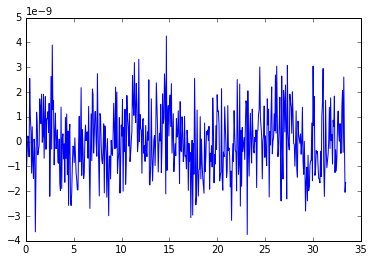

In [23]:
#pp = np.polyfit(t,lpx,4)
#plot(t,lpx)
plot(t,lpx-np.polyval(pp,t))

In [24]:
all_t = np.arange(ss.x.shape[0])/(ss.stream.stream_sample_rate)
detrendx = ss.x - np.polyval(pp,all_t)

In [25]:
pxx,fr = mlab.psd(detrendx,NFFT=2**16,Fs=ss.stream.stream_sample_rate)

In [29]:
from kid_readout.analysis.timeseries import binning

In [32]:
binning.log_bin??

In [40]:
_,_,fbin,(pbin,) = binning.log_bin(fr,30,pxx,)

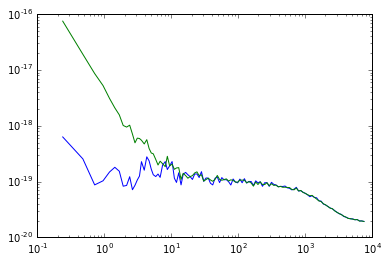

In [41]:

loglog(fbin,pbin)
loglog(ss.S_frequency,ss.S_xx)

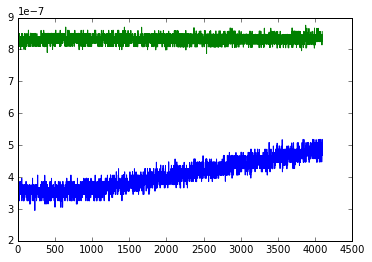

In [14]:
plot(ss.x[::128])
plot(ss.y[::128])